In [1]:
# Simple Linear Regression Model on Ukrainian War data Feb - Jul 2022
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel('Ukraine_violence.xlsx')

In [3]:
df.tail()

,Country,Year,Month,Events,Fatalities
50,Ukraine,2022,March,2065,4484
51,Ukraine,2022,April,1804,1863
52,Ukraine,2022,May,2322,2578
53,Ukraine,2022,June,2809,1411
54,Ukraine,2022,July,816,122


In [4]:
df_new = df.iloc[:,[1,2,4]]

In [5]:
df_new.head()

,Year,Month,Fatalities
0,2018,January,53
1,2018,February,26
2,2018,March,35
3,2018,April,39
4,2018,May,179


In [6]:
# df_new.loc[df_new['Year'] == '2022']
# df_new[df_new["Year"] == '2022']
# df_new.query("Year == '2022'")
# df2 = df_new.loc[(df_new['Year'] == '2022')]
# df2

In [7]:
df2022 = df_new.loc[df_new['Year'] == 2022]
cols = [1,2]
df2022_new = df2022[df2022.columns[cols]]
df2022_new

,Month,Fatalities
48,January,7
49,February,448
50,March,4484
51,April,1863
52,May,2578
53,June,1411
54,July,122


In [8]:
# X = df2022_new.iloc[:,:-1].values
# y = df2022_new.iloc[:,-1].values

In [9]:
print(df2022_new)

       Month  Fatalities
48   January           7
49  February         448
50     March        4484
51     April        1863
52       May        2578
53      June        1411
54      July         122


In [10]:
# import datetime as dt
# df2022['Month'] = pd.to_datetime(df2022['Month'])
# #df2022['Month'] = df2022['Month'].map(dt.datetime.toordinal)

In [11]:
# Encoding Month

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

scale_mapper = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7}
df2022_new["Month"] = df2022_new["Month"].replace(scale_mapper)

print(df2022_new)

    Month  Fatalities
48      1           7
49      2         448
50      3        4484
51      4        1863
52      5        2578
53      6        1411
54      7         122


C:\Users\nisti\AppData\Local\Temp/ipykernel_21608/800897051.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022_new["Month"] = df2022_new["Month"].replace(scale_mapper)


In [12]:
X = df2022_new.iloc[:,:-1].values
y = df2022_new.iloc[:,-1].values

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(y)

array([0, 2, 6, 4, 5, 3, 1], dtype=int64)

In [14]:
print(y)

[   7  448 4484 1863 2578 1411  122]


In [15]:
print(X)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = regressor.predict(X_test) # predicted deaths

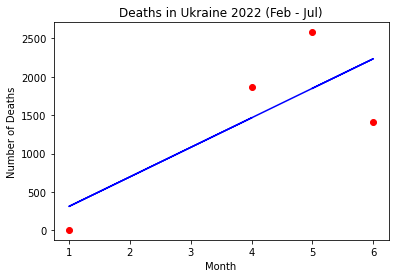

In [20]:
# Visualizing the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Deaths in Ukraine 2022 (Feb - Jul)')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.show()

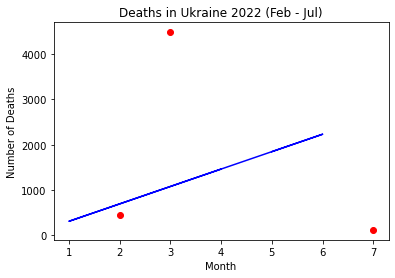

In [21]:
# Visualizing the Test set results 

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Deaths in Ukraine 2022 (Feb - Jul)')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.show()

In [22]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)